In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Netflix Userbase.csv')

In [7]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

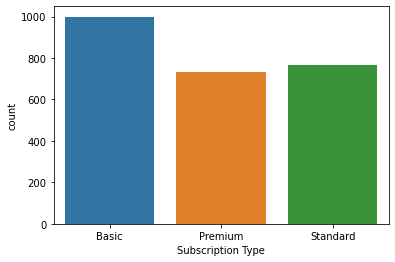

In [8]:
sns.countplot(x='Subscription Type',data=data)
data.columns

<AxesSubplot:>

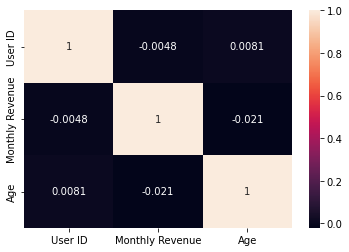

In [9]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Italy')])

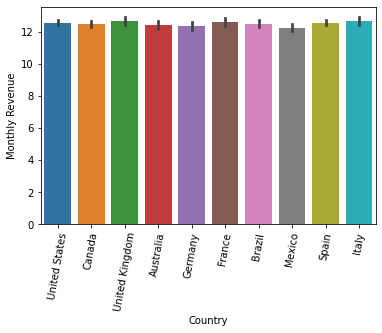

In [10]:
sns.barplot(data = data,x ='Country',y ='Monthly Revenue')
plt.xticks(rotation = 80)

<AxesSubplot:xlabel='Subscription Type', ylabel='Monthly Revenue'>

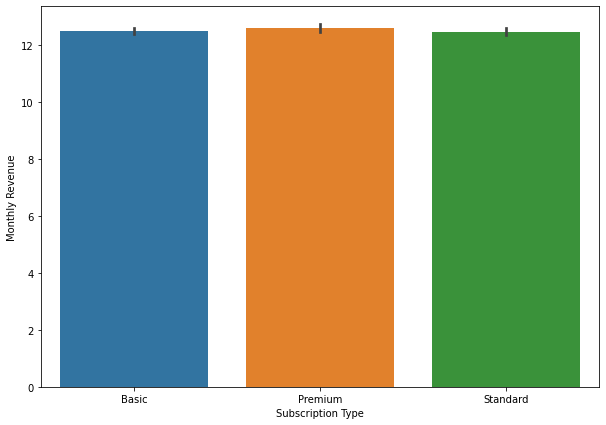

In [11]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Subscription Type',y='Monthly Revenue')

<AxesSubplot:xlabel='Subscription Type', ylabel='Monthly Revenue'>

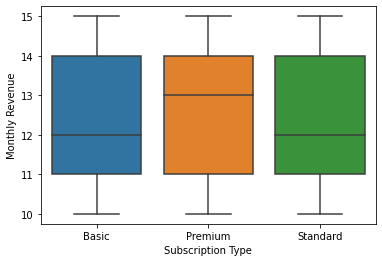

In [12]:
#plt.figure(figsize=(10,6))
sns.boxplot(data = data,x='Subscription Type',y='Monthly Revenue')

<AxesSubplot:xlabel='Gender', ylabel='count'>

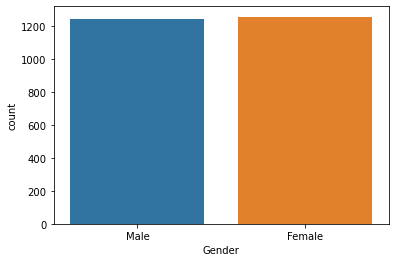

In [13]:
sns.countplot(data = data,x ='Gender')

In [14]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

In [15]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [16]:
data['duration'] = (data['Last Payment Date'] - data['Join Date']).dt.days

In [17]:
data = data.drop(columns = ['Join Date','Last Payment Date','Plan Duration','User ID','Gender'])

In [18]:
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Device,duration
0,Basic,10,United States,28,Smartphone,629
1,Premium,15,Canada,35,Tablet,774
2,Standard,12,United Kingdom,42,Smart TV,119
3,Standard,12,Australia,51,Laptop,262
4,Basic,10,Germany,33,Smartphone,174


In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
data[['Age','Monthly Revenue']] = scaler.fit_transform(data[['Monthly Revenue','Age']])

In [22]:
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Device,duration
0,Basic,-1.505590,United States,-1.487328,Smartphone,629
1,Premium,-0.529347,Canada,1.477367,Tablet,774
2,Standard,0.446896,United Kingdom,-0.301450,Smart TV,119
3,Standard,1.702066,Australia,-0.301450,Laptop,262
4,Basic,-0.808274,Germany,-1.487328,Smartphone,174


In [23]:
a = LabelEncoder()
b = LabelEncoder()
c = LabelEncoder()

In [24]:
data['Subscription Type'] = a.fit_transform(data['Subscription Type'])

In [25]:
data['Device'] = b.fit_transform(data['Device'])

In [26]:
data['Country'] = c.fit_transform(data['Country'])

In [27]:
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Device,duration
0,0,-1.505590,9,-1.487328,2,629
1,1,-0.529347,2,1.477367,3,774
2,2,0.446896,8,-0.301450,1,119
3,2,1.702066,0,-0.301450,0,262
4,0,-0.808274,4,-1.487328,2,174


In [28]:
X = data.drop(['Subscription Type'],axis = 1)

In [29]:
y = data['Subscription Type']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.25)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
tree = GradientBoostingClassifier(n_estimators = 155,learning_rate = 1,max_depth = 1,random_state = 42)

In [32]:
tree.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=155,
                           random_state=42)

In [33]:
tree.score(X_test,y_test)

0.6432

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
pred = tree.predict(X_test)

In [36]:
Accuracy_Score = accuracy_score(y_test,pred)
Accuracy_Score

0.6432

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
 lr.score(X_test,y_test)


0.027165445086587248

In [40]:
from sklearn.linear_model import LogisticRegression
lrr = LogisticRegression()

In [41]:
lrr.fit(X_train,y_train)

LogisticRegression()

In [42]:
lrr.score(X_test,y_test)

0.4032

In [43]:
import xgboost as xgb

In [44]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
xgb_classifier.score(X_test,y_test)

0.6064